In [1]:
import lucem_illud 

import scipy #For frequency analysis
import scipy.fftpack
import nltk #the Natural Language Toolkit
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import IPython #To show stuff
import Algorithmia


#Image handling install as Pillow
import PIL
import PIL.ImageOps

#install as scikit-image, this does the image manupulation
import skimage
import skimage.feature
import skimage.segmentation
import skimage.filters
import skimage.color
import skimage.graph
import skimage.future.graph

%matplotlib inline

import os
import os.path
import csv
import re

from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import time
import warnings
from wordcloud import WordCloud
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
def nsfw(url):
    
    client = Algorithmia.client('sim1pnxOzytPmigPd4x71tc7B501')
    algo = client.algo('spullara/YahooOpenNSFW/0.1.1')
    return algo.pipe(url).result

def nsfw_scores(url):
    p = urlopen(url)
    s = BeautifulSoup(p)
    img_tags = s.find_all('img')

    photos = []
    for link in [img['src'] for img in img_tags]:
        if 'https' in link:
            if link not in photos and len(photos) <5:
                photos.append(link)
    rv = []
    for photo in photos:
        rv.append(nsfw(photo))
    return rv

In [3]:
def nsfw(url):
    client = Algorithmia.client('sim1pnxOzytPmigPd4x71tc7B501')
    algo = client.algo('spullara/YahooOpenNSFW/0.1.1')
    return algo.pipe(url).result

In [4]:
vf_links_full = pd.read_csv("data/vanity fair links.csv")
vf_links = vf_links_full[:58]
links =  vf_links['url'].tolist()

In [5]:
%%time
all_scores = []
for link in links:
    scores = nsfw_scores(link)
    all_scores.append(scores)

CPU times: user 8.59 s, sys: 734 ms, total: 9.32 s
Wall time: 6min 54s


In [6]:
vf_links['scores'] = all_scores

In [7]:
a = vf_links['scores'][0]
np.mean(a)

0.017997334152460097

In [8]:
def get_mean(row):
    return np.mean(row['scores'])

vf_links['mean_score'] = vf_links.apply (lambda row: get_mean(row), axis=1 )

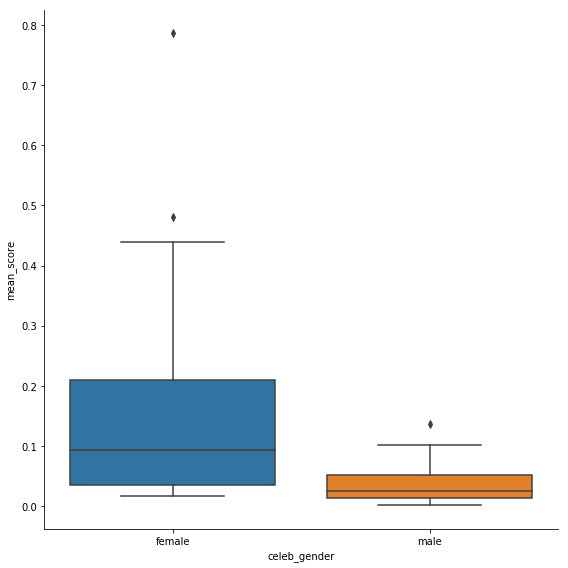

In [9]:
sns.factorplot(kind ='box',        # Boxplot
               y = 'mean_score',       # Y-axis - values for boxplot
               x ='celeb_gender',        # X-axis - first factor
               data = vf_links,
               size = 8,            # Figure size (x100px)      
               aspect = 1,        # Width = size * aspect 
               legend_out = False)  # Mak

# Outliers : Serena Williams, Sofia Vergara, Jimmy Kimmel(!)

In [10]:
names = []
genders = []
scores = []
for index, row in vf_links.iterrows():
    name = [row['interviewee']]*5
    gender = [row['celeb_gender']]*5
    score = row['scores']
    names.extend(name)
    genders.extend(gender)
    scores.extend(score)

In [11]:
df = pd.DataFrame(names)

In [12]:
df.columns = ['name']
df['gender'] = genders
df['score'] = scores

In [13]:
def get_converted_score(row):
    if row['score'] <= 0.1:
        return 1
    if row['score'] <= 0.2:
        return 2
    if row['score'] <= 0.3:
        return 3
    return 4

df['converted_score'] = df.apply (lambda row: get_converted_score(row), axis=1 )

In [14]:
import random
import numpy as np
from numpy.random import choice
np.random.seed(1234)

In [20]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd#Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths
write = df[['coder_1','coder_2','coder_3','coder_4','coder_5']]

In [69]:
write = write.replace(6, 5)
write = write.replace(0, 1)
write = write.replace(-1, 1)



np.savetxt('codes.txt', write.values, fmt='%d')


In [70]:
x = np.loadtxt("codes.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [71]:
anno.labels
#anno.missing_values


[1.0, 2.0, 3.0, 4.0, 5.0]

In [72]:
pyanno.measures.agreement.labels_frequency(anno.annotations,5)

array([0.59950739, 0.19852217, 0.08423645, 0.08571429, 0.0320197 ])

[[35.  7.  0.  0.  0.]
 [87. 24.  2.  0.  0.]
 [54. 24.  1.  1.  0.]
 [ 5.  6.  6.  6.  2.]
 [ 0.  0.  8. 13.  9.]]


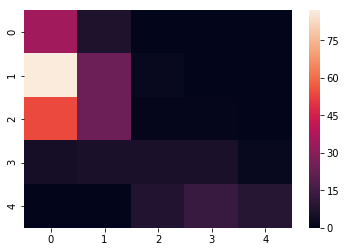

In [73]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [74]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])


-0.025156198618875306

In [75]:
krippendorffs_alpha(anno.annotations[::])


0.7106139372474658

In [76]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])


0.07513164725951199

In [77]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.07513165 0.04192056 0.07383055 0.15289822 0.03040521
  0.03040521]
 [0.07513165 1.         0.3565183  0.22130076 0.33076035 0.40388432
  0.40388432]
 [0.04192056 0.3565183  1.         0.30960942 0.26661002 0.71914577
  0.71914577]
 [0.07383055 0.22130076 0.30960942 1.         0.18521987 0.43678226
  0.43678226]
 [0.15289822 0.33076035 0.26661002 0.18521987 1.         0.27845486
  0.27845486]
 [0.03040521 0.40388432 0.71914577 0.43678226 0.27845486 1.
  1.        ]
 [0.03040521 0.40388432 0.71914577 0.43678226 0.27845486 1.
  1.        ]]


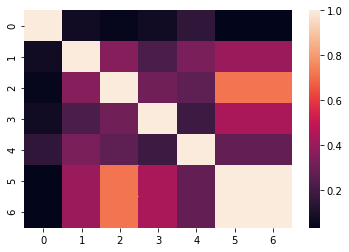

In [78]:
ax = seaborn.heatmap(m)
plt.show()

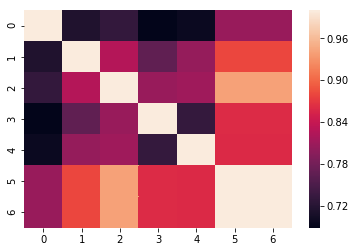

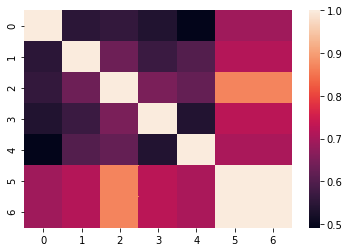

In [79]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [80]:
model = ModelB.create_initial_state(5,5)
samples = model.sample_posterior_over_accuracy(anno.annotations, 100, burn_in_samples=50, thin_samples=3)
model.map(anno.annotations)
posterior = model.infer_labels(anno.annotations)

PyannoValueError: Annotations are incompatible with model parameters

In [66]:
def makeQuestionComparison(model, anno_target, num_questions = 10):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

In [67]:

makeQuestionComparison(model, anno)


PyannoValueError: Annotations are incompatible with model parameters

In [68]:
model = ModelBt.create_initial_state(5,5)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 100, burn_in_samples=50, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)
plt.figure()
plt.errorbar(range(5),y, yerr = y_ci)
plt.show()

PyannoValueError: Annotations are incompatible with model parameters

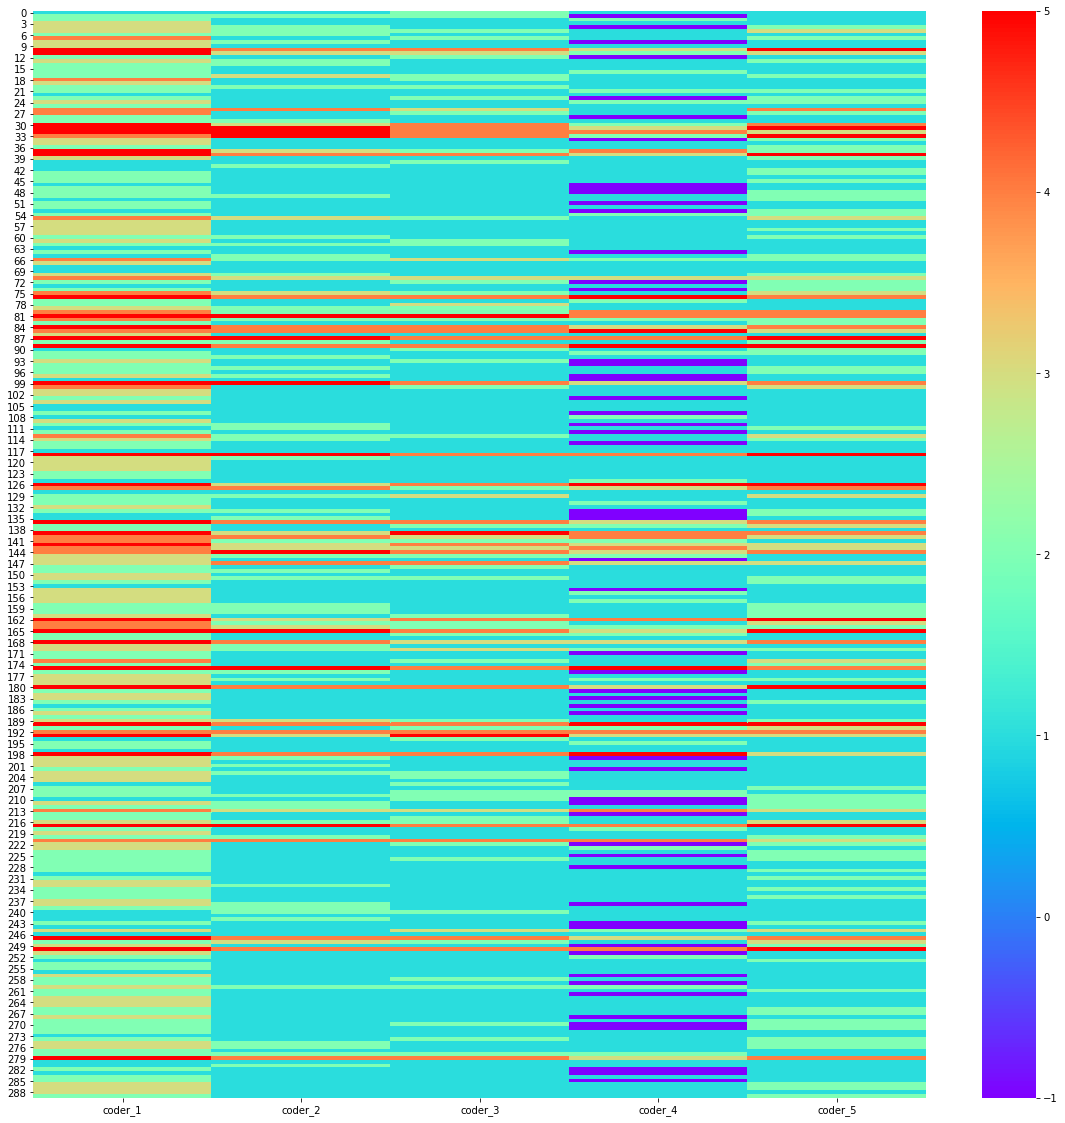

In [36]:
df_hotels = write
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

In [37]:

hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [38]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 5)#6 possible catagories


array([0.52261307, 0.24623116, 0.10839914, 0.07609476, 0.04666188])

[[35.  7.  0.  0.  0.]
 [87. 24.  2.  0.  0.]
 [54. 24.  1.  1.  0.]
 [ 5.  6.  6.  6.  2.]
 [ 0.  0.  8. 13.  9.]]


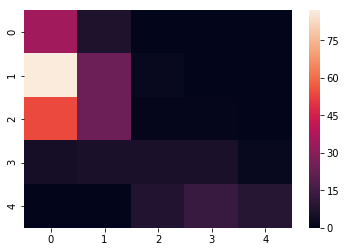

In [39]:

c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 5) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [40]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])


-0.025156198618875306

In [41]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])


0.07513164725951199

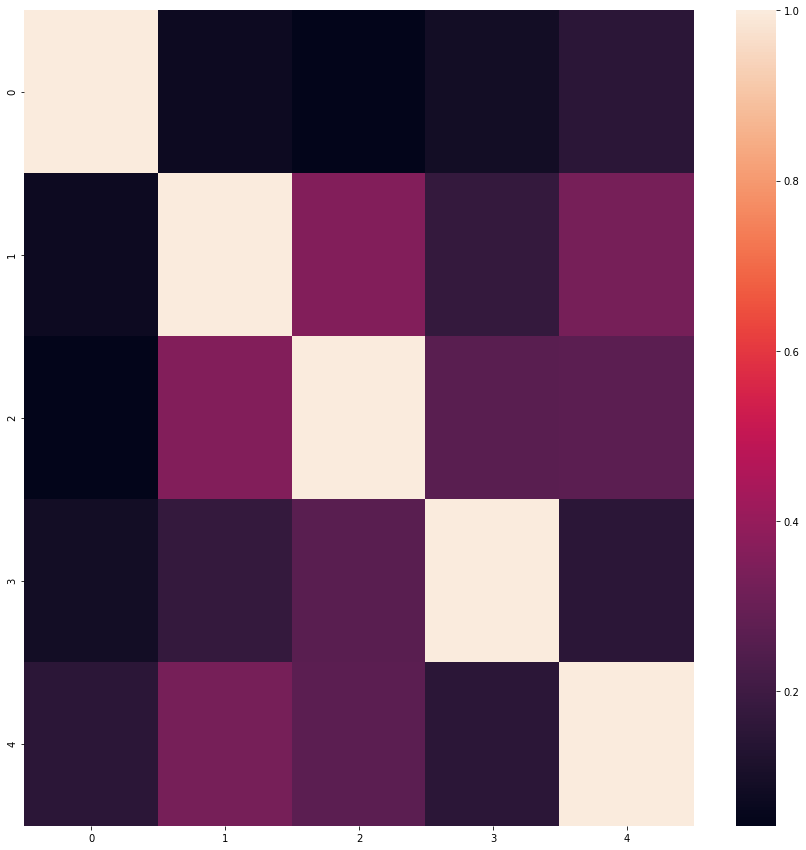

In [42]:

m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

In [48]:
write['NSFW Score'] = df['converted_score']

In [83]:
write = write[write.coder_4 > 0]


In [84]:
test = write.T

In [85]:
p = ['coder_1', 'coder_2','coder_3','coder_4', 'coder_5', 'nsfw']*290
p = sorted(p)
q = write['coder_1'].tolist() + write['coder_2'].tolist() + write['coder_3'].tolist() + write['coder_4'].tolist() + write['coder_5'].tolist() + write['nsfw'].tolist()

In [86]:
test = pd.DataFrame(
    {'coder': p,
     'score': q    })

Text(6.675,0.5,'Score')

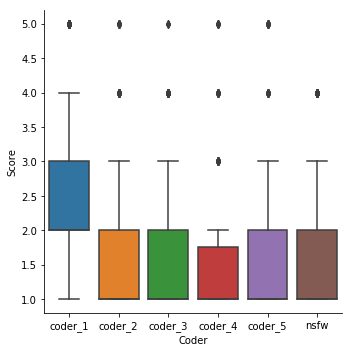

In [89]:
g = sns.factorplot(kind ='box',        # Boxplot
               y = 'score',       # Y-axis - values for boxplot
               x ='coder',        # X-axis - first factor
               data = test,
               size = 5,            # Figure size (x100px)      
               aspect = 1,        # Width = size * aspect 
               legend_out = False)  #
ax = g.axes.flatten()
ax[0].set_xlabel("Coder")
ax[0].set_ylabel("Score")